### Project Description

This dataset includes details of applicants who have applied for loan. The dataset includes details like credit history, loan amount, their income, dependents etc. 

#### Independent Variables:
1. Loan_ID - This refer to the unique identifier of the applicant's affirmed purchases
2. Gender - This refers to either of the two main categories (male and female) into which applicants are divided on the basis of their reproductive functions
3. Married - This refers to applicant being in a state of matrimony
4. Dependents - This refres to persons who depends on the applicants for survival
5. Education - This refers to number of years in which applicant received systematic instruction, especially at a school or university
6. Self_Employed - This refers to applicant working for oneself as a freelancer or the owner of a business rather than for an employer
7. Applicant Income - This refers to disposable income available for the applicant's use under State law.
8. CoapplicantIncome - This refers to disposable income available for the people that participate in the loan application process alongside the main applicant use under State law.
9. Loan_Amount - This refers to the amount of money an applicant owe at any given time.
10. Loan_Amount_Term - This refers to the duaration in which the loan is availed to the applicant
11. Credit History - This refers to a record of applicant's ability to repay debts and demonstrated responsibility in repaying them.
12. Property_Area - This refers to the total area within the boundaries of the property as set out in Schedule.
13. Loan_Status - This refres to whether applicant is eligible to be availed the Loan requested.

You have to build a model that can predict whether the loan of the applicant will be approved(Loan_status) or not on the basis of the details provided in the dataset.


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

### Data selection and description

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/loan_prediction.csv')
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


From a first look at our dataset we can see that we have string, int, and float datatype. We've got 13 columns, 12 of them are features and 'Loan_Status' is our target variable. For our luck each column is explained in project description. We will see further wich feature is more important for our analusis using correlation method. From my thoughts I would have a look at 'Married', 'Dependents', 'Education, 'ApplicantIncome'. Probably it is a link between 'ApplicantIncome' and 'LoanAmount', the higher the income, the higher the loan would be logic. Also, 'LoanAmount' should have a strong correlation with 'Property_Area', if it is Urban the cost is bigger than a Rural or Semiurban property. 

## Exploratory Data Analysis (EDA)

In [3]:
df.shape

(614, 13)

Using shape method we can see that our dataset have 13 columns and 614 raws. 

In [4]:
# Check for nulls in train set

df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

Furthermore we can see that we have to deal with some null values. The values are not big so I will opt to replace them using mean or mode method regarding the fact that we have to deal with categorical and continous data. 

In [5]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

We have dtypes object, float and integer. We'll need to encode the object dtype later on. 

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


Using .info() method we can see the null, values, dtype and columns name. Also it mention the number of columns and rows and the number of each dtype we have, 4 float, 1 int, and 8 object. I will fill the null values on object dtype using forward fill and mean for columns with numbers. 

In [7]:
df['Gender'].fillna( method ='ffill', inplace = True)
df['Married'].fillna( method ='ffill', inplace = True)
df['Dependents'].fillna( method ='ffill', inplace = True)
df['Self_Employed'].fillna( method ='ffill', inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            614 non-null    object 
 3   Dependents         614 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      614 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [8]:
# To insert the mean value of each column into its missing rows:
df.fillna(df.mean(numeric_only=True).round(1), inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            614 non-null    object 
 3   Dependents         614 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      614 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


We can see that the null values are gone. Our data is clear in this way so we can go further with our analysis. 

In [9]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.4,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [10]:
df.drop('Loan_ID', axis = 1, inplace = True)
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,146.4,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


I get rid of 'Loan_ID' column because it was an index column and it's not relevant for our analysis. 

In [11]:
df.nunique()

Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           204
Loan_Amount_Term      11
Credit_History         3
Property_Area          3
Loan_Status            2
dtype: int64

In [12]:
# checking the value counts of each column
for i in df.columns:
    print(df[i].value_counts())
    print('\n')

Male      500
Female    114
Name: Gender, dtype: int64


Yes    400
No     214
Name: Married, dtype: int64


0     354
2     105
1     104
3+     51
Name: Dependents, dtype: int64


Graduate        480
Not Graduate    134
Name: Education, dtype: int64


No     528
Yes     86
Name: Self_Employed, dtype: int64


2500    9
4583    6
6000    6
2600    6
3333    5
       ..
3244    1
4408    1
3917    1
3992    1
7583    1
Name: ApplicantIncome, Length: 505, dtype: int64


0.0       273
2500.0      5
2083.0      5
1666.0      5
2250.0      3
         ... 
2791.0      1
1010.0      1
1695.0      1
2598.0      1
240.0       1
Name: CoapplicantIncome, Length: 287, dtype: int64


146.4    22
120.0    20
110.0    17
100.0    15
160.0    12
         ..
240.0     1
214.0     1
59.0      1
166.0     1
253.0     1
Name: LoanAmount, Length: 204, dtype: int64


360.0    512
180.0     44
480.0     15
342.0     14
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1

From 'nunique' and 'value_count' we can see a lot of details about our data. We can see that all columns with categorical data have binary data. This helps us to choose what kind of encoder to use. We can also see that a lot of applicants are Male,  most of them are Married with studies and more than half dont have any Dependent. In case of 'Property_Area' the things are pretty balanced. For the next steps I will use some graphs to see some correlations between features and label and after that I will encode the categorical columns, I will use .corr and heatmap method to see the correlation between all the features. 

In [13]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,146.411726,342.000000,0.838762
std,6109.041673,2926.248369,84.037468,64.372489,0.349872
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000
50%,3812.500000,1188.500000,129.000000,360.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


We use the describe method to check for descrepancies in our dataset as outliers or skiwenes. 
count - show us the number of values. All the same, so no null. 
mean - mean shoud be almost equal with 50% because it shows us the mean value of that column. If we have big differences between this two rows our data is skeewed. 
std - is standard deviation error. 
min - is the min value
25% - is the first quantile
50% - is the second quantile 
75% - is the third quantile and also if we have huge differences bewtween this and max row it mean that we got outliers
max - indicates the max value of the dataset. 

<Axes: xlabel='Married', ylabel='count'>

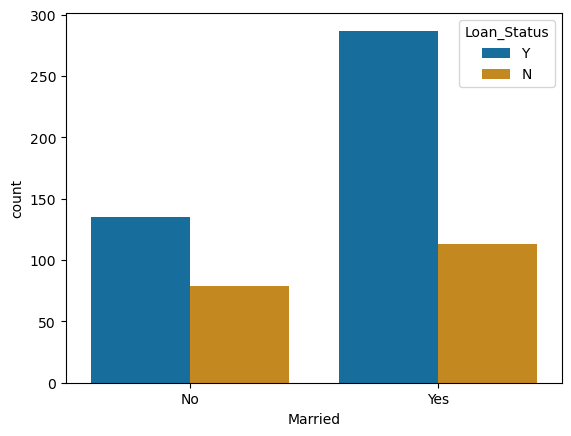

In [14]:

sns.countplot(x ='Married', hue = 'Loan_Status', data = df, palette = 'colorblind')

We ca see from the countplot graph that married applicants are a lot more than unmarried. Also we can observe that the succeeding rate is higher in both cases and is a lot higher for married applicants. 

<Axes: xlabel='Dependents', ylabel='count'>

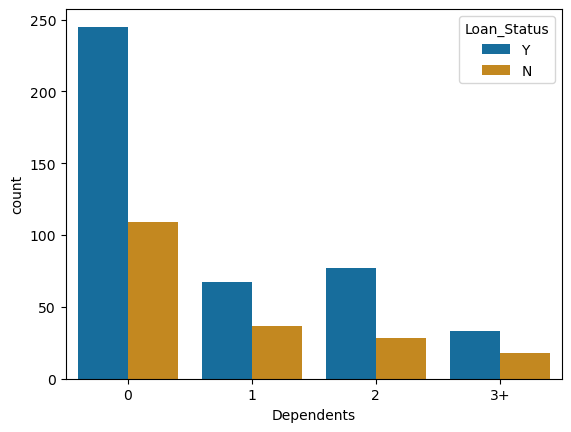

In [15]:
sns.countplot(x ='Dependents', hue = 'Loan_Status', data = df, palette = 'colorblind')

The most applicants don't have any dependets, and the number decrease along with the increase of dependets, wich are mostly children, probably. 

<Axes: xlabel='Education', ylabel='count'>

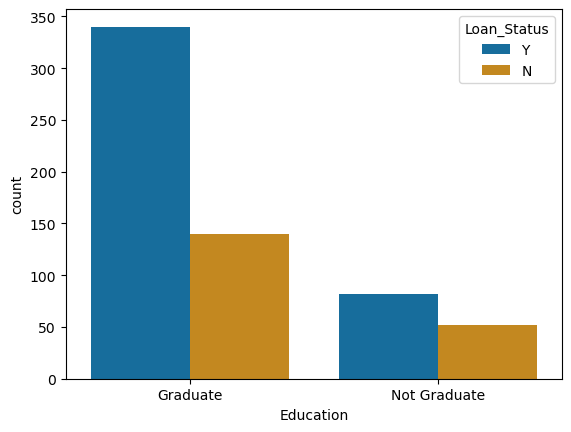

In [16]:
sns.countplot(x ='Education', hue = 'Loan_Status', data = df, palette = 'colorblind')

Most of the applicants have a degree and the number that didn't graduate and applied for a loan are drasticaly lower. 

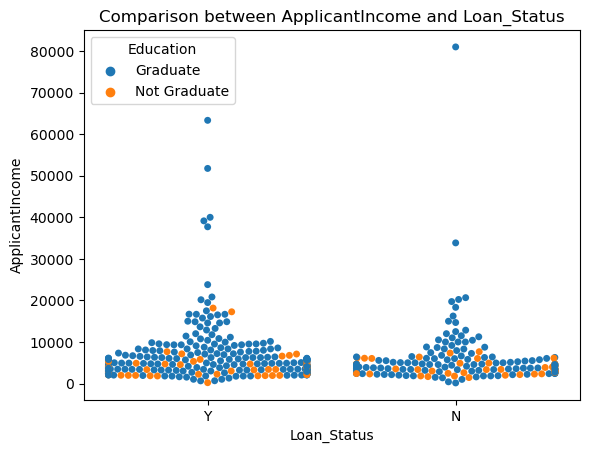

In [17]:
plt.title('Comparison between ApplicantIncome and Loan_Status')
sns.swarmplot(x = 'Loan_Status', y = 'ApplicantIncome', hue = 'Education', data = df, )
plt.show()

We can see that the income range is almost the same for most of the applicants and most of them get a positive response. Let's encode the categorical columns and see te correlation using heatmap. 

In [18]:
from sklearn.preprocessing import OrdinalEncoder
OE= OrdinalEncoder()
for i in df.columns:
    if df[i].dtypes=='object':
        df[i] = OE.fit_transform(df[i].values.reshape(-1,1))
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1.0,0.0,0.0,0.0,0.0,5849,0.0,146.4,360.0,1.0,2.0,1.0
1,1.0,1.0,1.0,0.0,0.0,4583,1508.0,128.0,360.0,1.0,0.0,0.0
2,1.0,1.0,0.0,0.0,1.0,3000,0.0,66.0,360.0,1.0,2.0,1.0
3,1.0,1.0,0.0,1.0,0.0,2583,2358.0,120.0,360.0,1.0,2.0,1.0
4,1.0,0.0,0.0,0.0,0.0,6000,0.0,141.0,360.0,1.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0.0,0.0,0.0,0.0,0.0,2900,0.0,71.0,360.0,1.0,0.0,1.0
610,1.0,1.0,3.0,0.0,0.0,4106,0.0,40.0,180.0,1.0,0.0,1.0
611,1.0,1.0,1.0,0.0,0.0,8072,240.0,253.0,360.0,1.0,2.0,1.0
612,1.0,1.0,2.0,0.0,0.0,7583,0.0,187.0,360.0,1.0,2.0,1.0


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    float64
 1   Married            614 non-null    float64
 2   Dependents         614 non-null    float64
 3   Education          614 non-null    float64
 4   Self_Employed      614 non-null    float64
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    float64
 11  Loan_Status        614 non-null    float64
dtypes: float64(11), int64(1)
memory usage: 57.7 KB


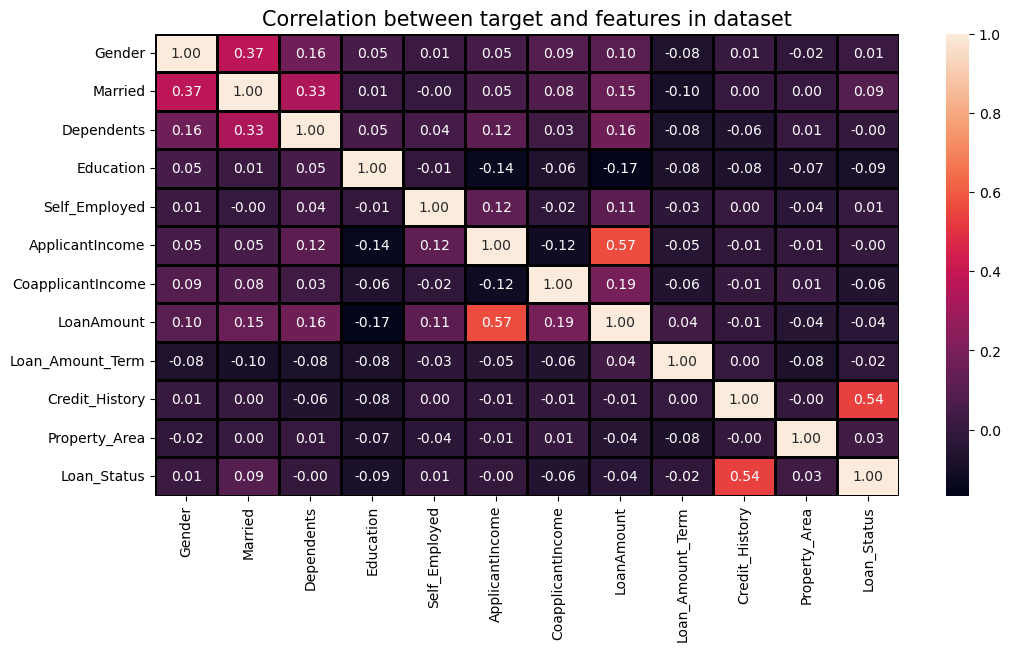

In [20]:
plt.figure(figsize = (12, 6))
sns.heatmap(df.corr(), annot=True, fmt='0.2f', lw = 2, linecolor = 'black')
plt.title ('Correlation between target and features in dataset', fontsize = 15)
plt.show()

The heatmap show us some very logical correlation. We can see that the target 'Loan_Status' is highly correlated with 'Credit_History' wich mean if the applicant have a bad history regarding the payment of an old loan it is not likely to get a new one. Also 'LoanAmount' and 'ApplicantIncome' have a 57% correlation because if the applicant have a high income he can ask for a high loan. We can also see an above 30% correlation between 'Gender', 'Married' and 'Dependents' feature wich is also logic, because if we have a male, let's say, he is married he will go for a loan, also if someone is married is more likely to have kids, so depdendents. 

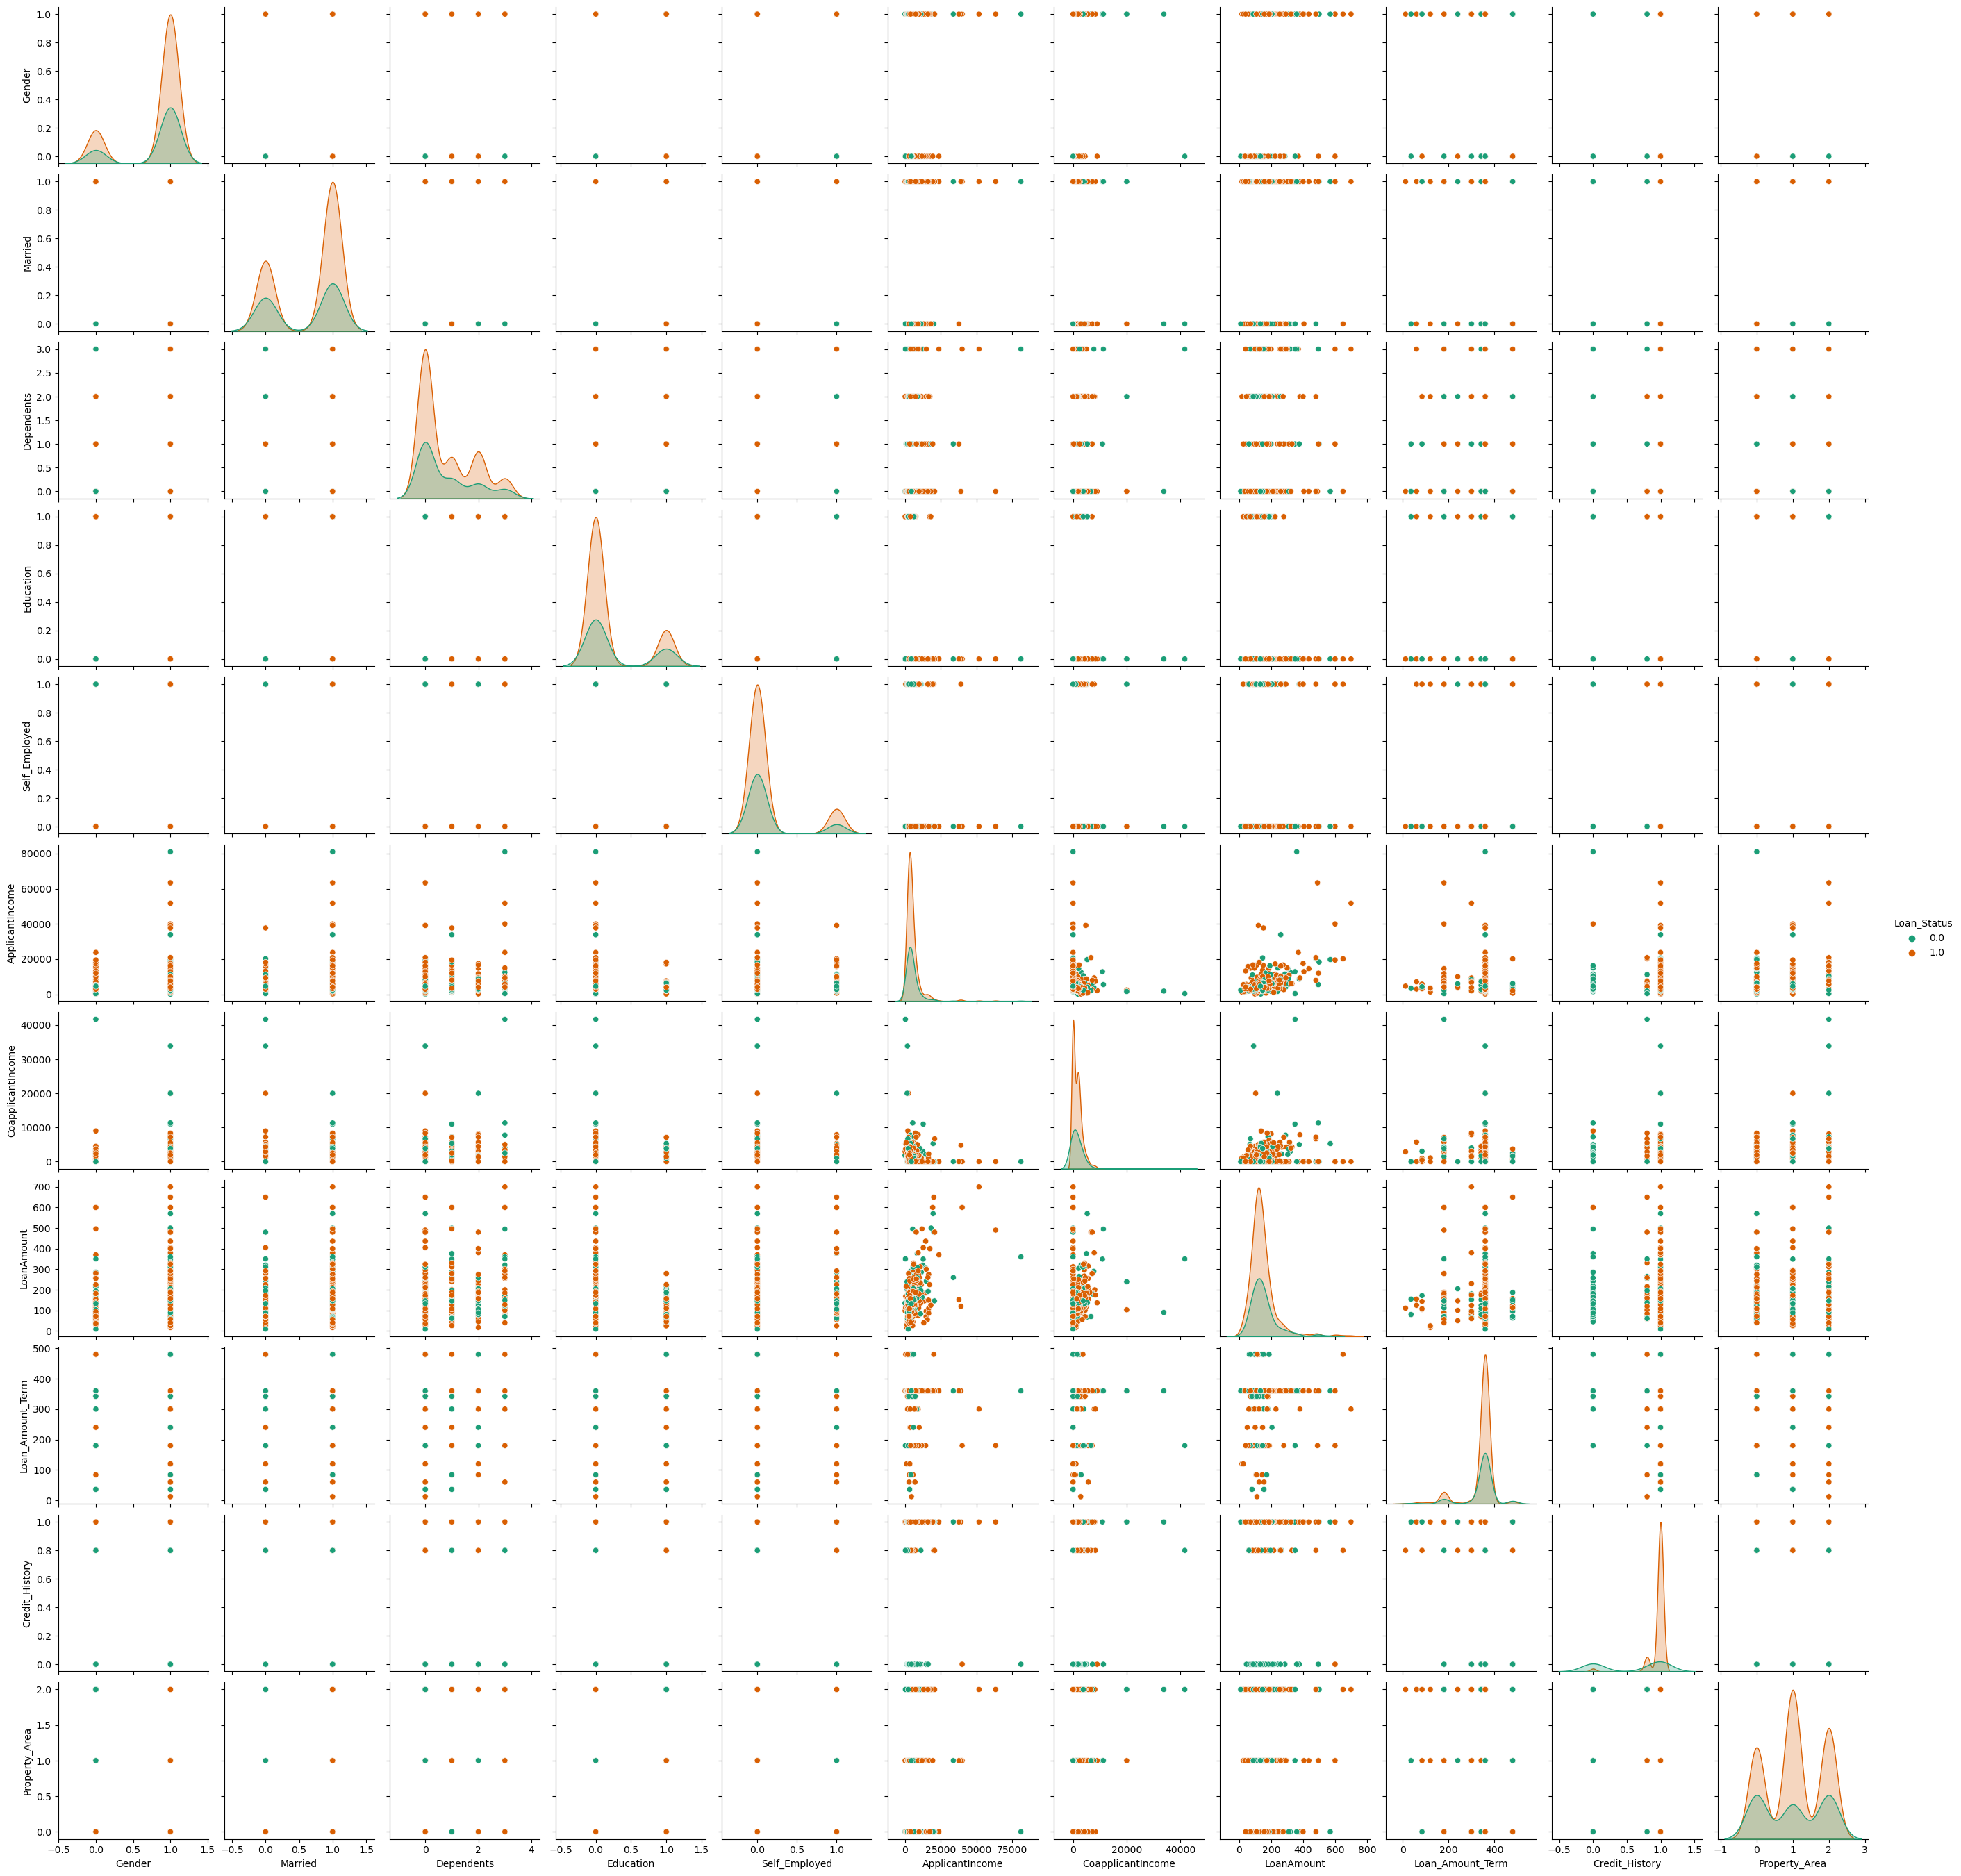

In [21]:
sns.pairplot(df, hue = 'Loan_Status', palette = 'Dark2')
plt.show()

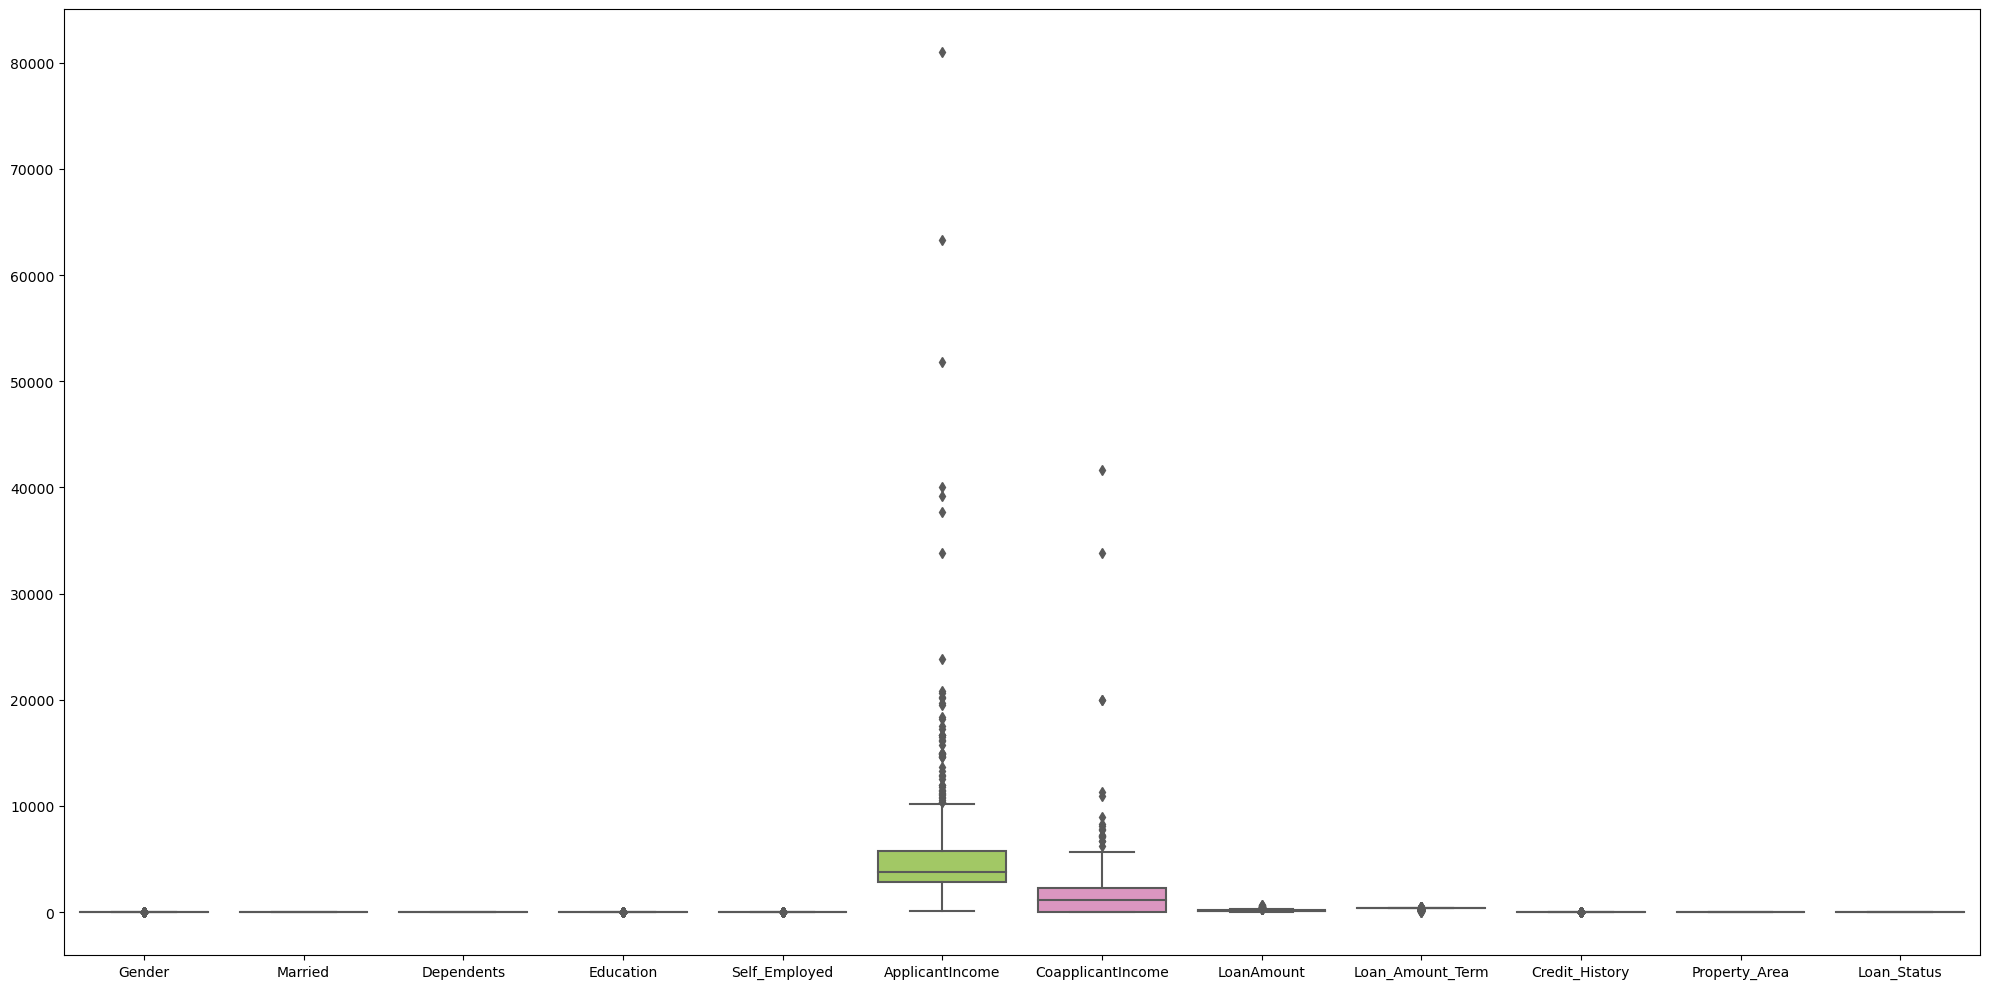

In [25]:
# Lets check the outliers by plotting boxplot. 
plt.figure(figsize = (20, 10), facecolor = 'white')
sns.boxplot(df,palette = 'Set2_r')
plt.tight_layout()

We have outliers in 'ApplicantIncome' and 'CoapplicantIncome' columns but it can be a normal situation that some applicants to have higher income than most of applicants. I will go further and create the model. 

### Model building

In [23]:
# I separate the target from the feature
x = df.drop('Loan_Status', axis = 1)
y = df['Loan_Status']
print(x.shape)
print(y.shape)

(614, 11)
(614,)


In [24]:
# Feature scaling using Standard Scalarization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns = x.columns)

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
maxAccu = 0 
maxRS = 0
for i in range(1,200): # we can take any rainge
    x_train, x_test, y_train, y_test = train_test_split(x,y, test_size= 0.30, random_state = i)
    RFR = RandomForestClassifier()
    RFR.fit(x_train, y_train)
    pred = RFR.predict(x_test)
    acc = accuracy_score(y_test, pred)
    if acc>maxAccu:
        maxAccu = acc
        maxRS = i
print ('Best accuracy is', maxAccu, 'at random_State', maxRS)

Best accuracy is 0.8432432432432433 at random_State 158


In [27]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.30, random_state = maxRS)

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import AdaBoostClassifier

In [31]:
LR = LogisticRegression()
KNN = KNeighborsClassifier(n_neighbors=5)
SVM = SVC(kernel='linear',C=1)
ADA = AdaBoostClassifier()
RFC = RandomForestClassifier(n_estimators= 20, max_depth=140, bootstrap= True)

In [32]:
for model in [LR, KNN, SVM, ADA, RFC]:
    model.fit(x_train, y_train)
    y_pred_train = model.predict(x_train)
    y_pred_test = model.predict(x_test)
    
    pred_train_df = accuracy_score(y_train, y_pred_train)
    pred_test_df = accuracy_score(y_test, y_pred_test)
    
    print(f"model: {model}\nTrain Accuracy: {pred_train_df}\nTest Accuracy: {pred_test_df}\n\n")

model: LogisticRegression()
Train Accuracy: 0.7902097902097902
Test Accuracy: 0.8540540540540541


model: KNeighborsClassifier()
Train Accuracy: 0.8228438228438228
Test Accuracy: 0.8324324324324325


model: SVC(C=1, kernel='linear')
Train Accuracy: 0.7878787878787878
Test Accuracy: 0.8594594594594595


model: AdaBoostClassifier()
Train Accuracy: 0.8461538461538461
Test Accuracy: 0.8324324324324325


model: RandomForestClassifier(max_depth=140, n_estimators=20)
Train Accuracy: 0.9976689976689976
Test Accuracy: 0.8162162162162162




### Hyperparameter tuning

In [36]:
# RandomForestClassifier
from sklearn.model_selection import GridSearchCV

parameters = {'criterion': ['gini', 'entropy','log_loss'],
              'max_depth': [10,50,100,120],
              'min_samples_split':[10, 50, 1000],
              'min_samples_leaf':[1,10,22,44],
              'max_features':['sqrt','log2']}

In [37]:
GCV= GridSearchCV(RandomForestClassifier(), parameters, cv = 5)

In [38]:
GCV.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [10, 50, 100, 120],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 10, 22, 44],
                         'min_samples_split': [10, 50, 1000]})

In [39]:
GCV.best_params_

{'criterion': 'gini',
 'max_depth': 100,
 'max_features': 'log2',
 'min_samples_leaf': 1,
 'min_samples_split': 10}

In [40]:
Final_model = RandomForestClassifier(criterion = 'gini', max_depth = 100, min_samples_split = 10 , min_samples_leaf = 1, max_features = 'log2')
Final_model.fit(x_train, y_train)
pred = Final_model.predict(x_test)
acc = accuracy_score(y_test, pred)
print(acc*100)

84.32432432432432


In [41]:
import joblib
joblib.dump(Final_model, 'Loan_Application_Status_Prediction.pkl')

['Loan_Application_Status_Prediction.pkl']

In [42]:
# lets load the saved model and get the predictions
model = joblib.load('Loan_Application_Status_Prediction.pkl')

# prediction
prediction = model.predict(x_test)
prediction

array([1., 1., 1., 0., 0., 1., 1., 0., 0., 1., 1., 0., 1., 1., 1., 0., 1.,
       1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 0.,
       1., 0., 1., 1., 0., 1., 0., 1., 1., 1., 0., 1., 1., 0., 1., 1., 1.,
       1., 1., 1., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0.,
       1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 0.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 0., 1., 1., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1.])

In [43]:
a = np.array(y_test) # this is to convert y_test intro array
df = pd.DataFrame({'Predicted':prediction,'Orignial':a})
df

,Predicted,Orignial
0,1.0,1.0
1,1.0,1.0
2,1.0,1.0
3,0.0,0.0
4,0.0,0.0
...,...,...
180,1.0,1.0
181,0.0,0.0
182,1.0,1.0
183,1.0,0.0


In [44]:
conclusion = pd.DataFrame([model.predict(x_test)[:]], index = ['Predicted','Original'])
conclusion

,0,1,2,3,4,5,6,7,8,9,...,175,176,177,178,179,180,181,182,183,184
Predicted,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0
Original,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0
